## Random forest

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np

housing = pd.read_csv('Data/housing.csv')

housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]


### Concepto total de variables

Árbol normal

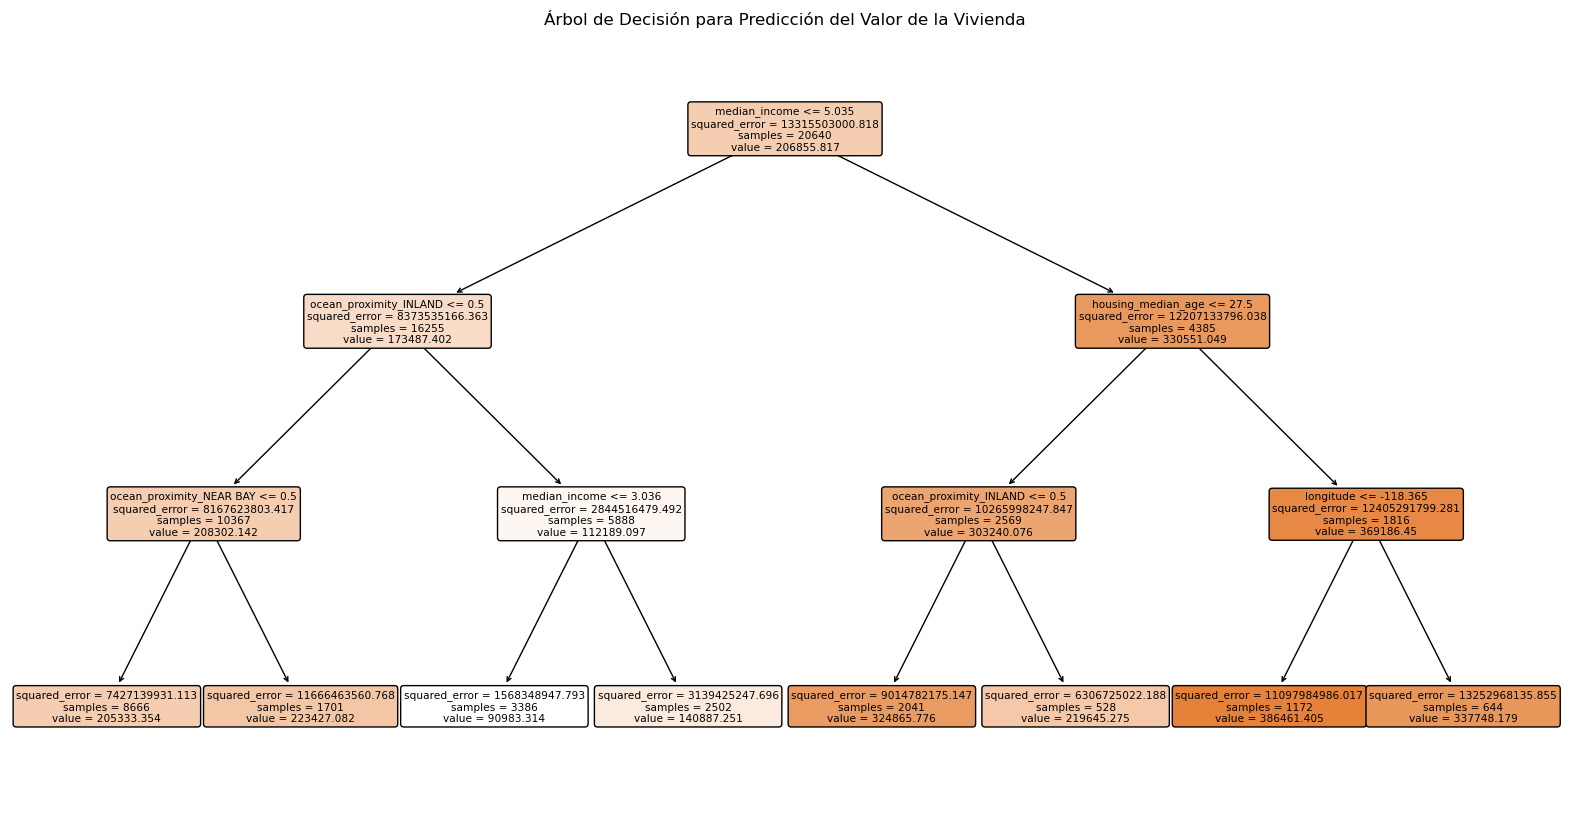

In [5]:
# Train model    
model = DecisionTreeRegressor(max_depth=3, random_state=42, 
                                  max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()

### Maximo 3 features

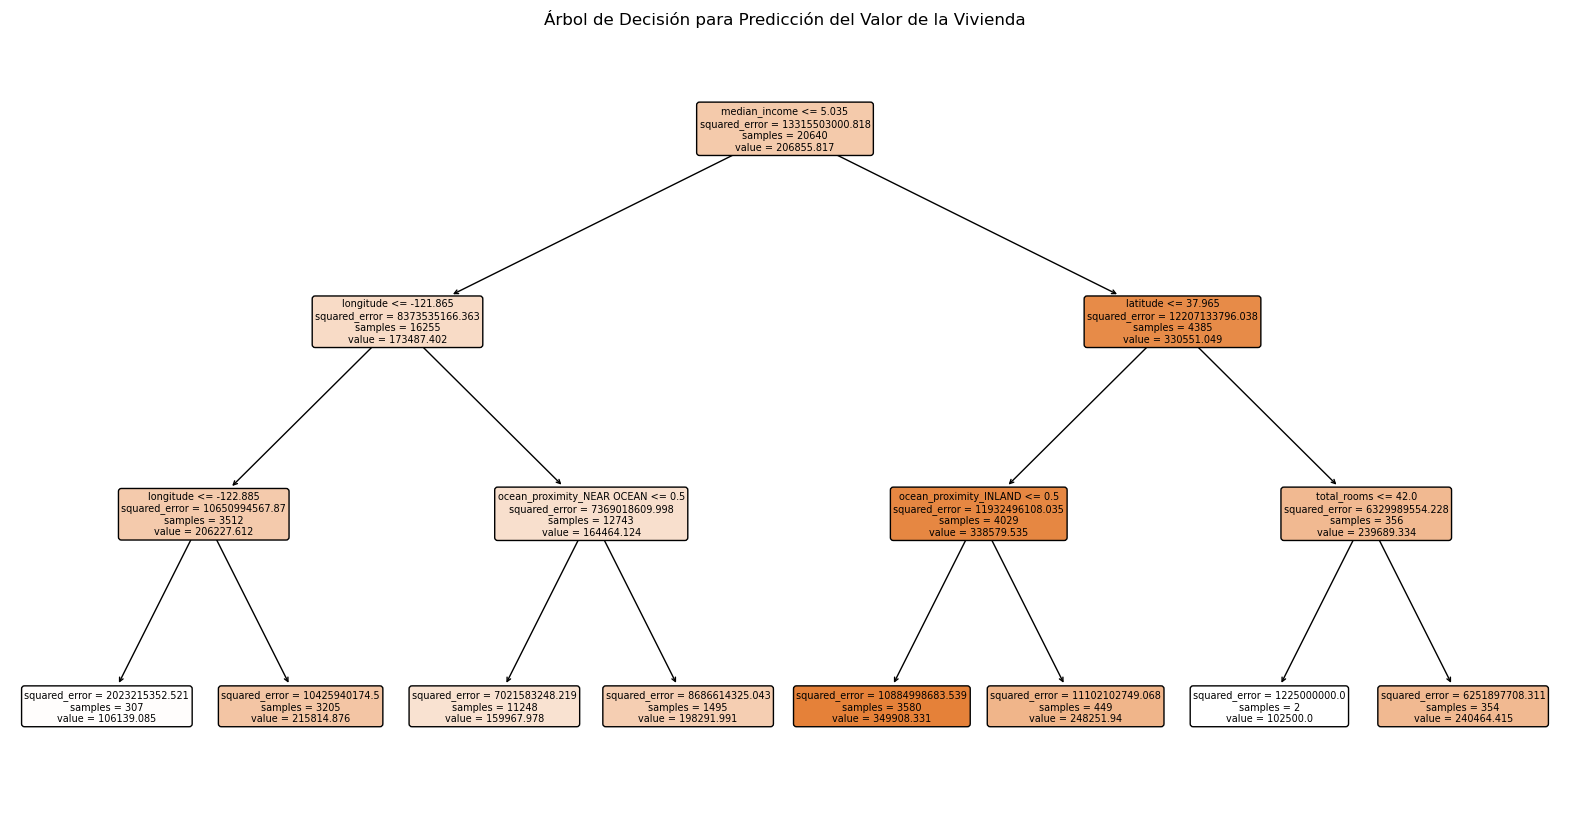

In [6]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeRegressor(max_depth=3, random_state=42, 
                                  max_features=2)
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()

### Maximo 2 features


In [5]:
# Crear y entrenar el modelo de árbol de decisión


In [6]:
# Random int


### Bootstrap tree

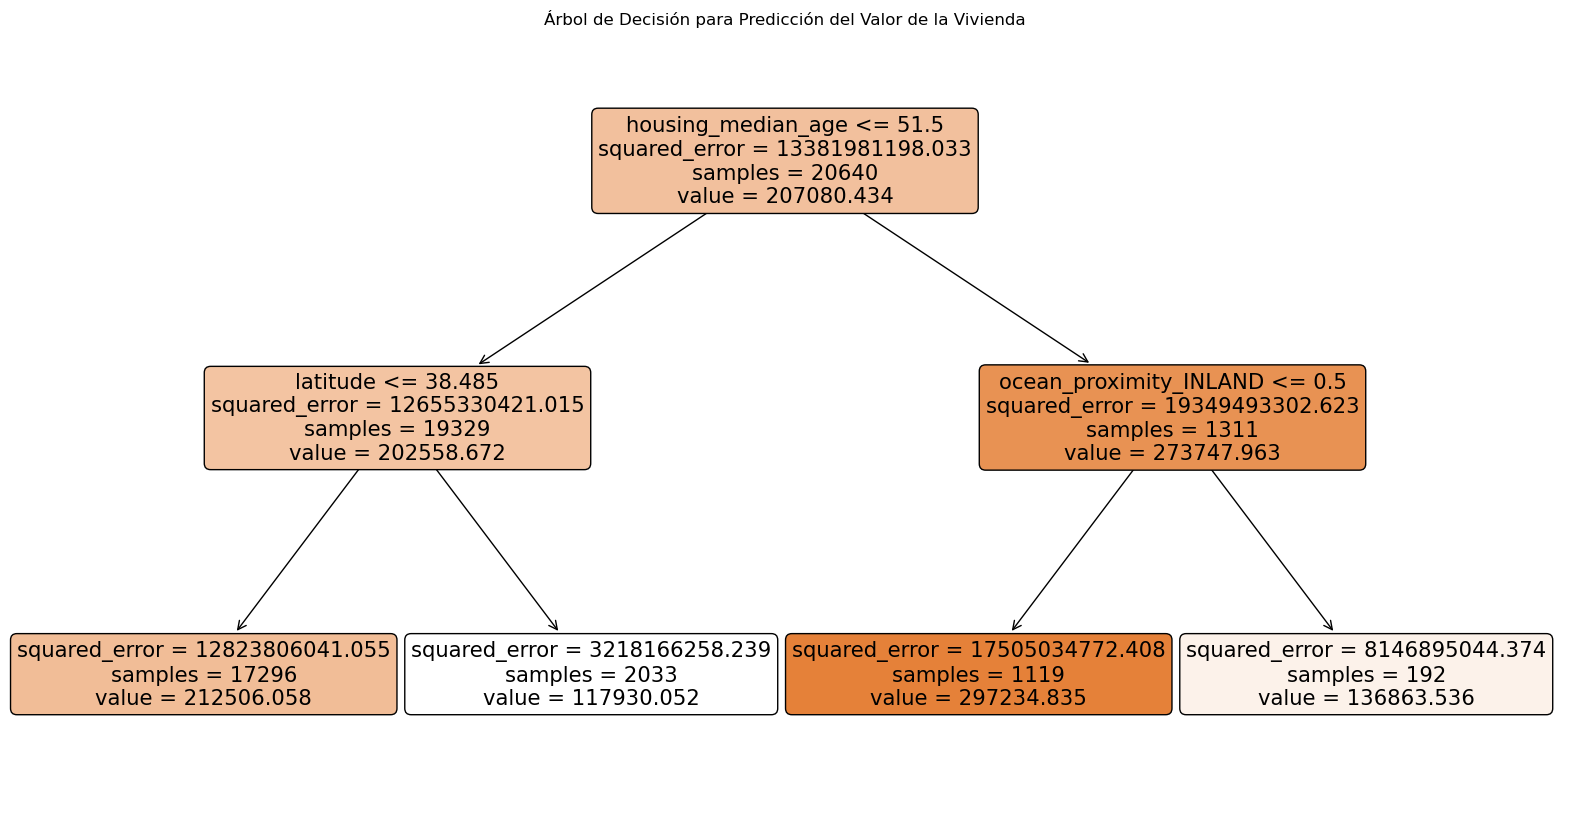

In [14]:
# Crea un bootrap tree, cambia el random_state

bootstrap_housing = housing.sample(len(housing), replace=True)
X = bootstrap_housing.drop(target, axis=1)
y = bootstrap_housing[target]



model = DecisionTreeRegressor(max_depth=2, random_state=4, 
                                  max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()


### Crea un bosque 

In [48]:
import random
random_states = np.linspace(1, 100, 100)

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
# X train y test
# Dividir en entrenamiento y prueba
test_bootstrap = housing.sample(300)
X_sample = test_bootstrap.drop(target, axis=1)
y_sample = test_bootstrap[target]

df_predicciones = pd.DataFrame()
for i in range(300):
    bootstrap_housing = housing.sample(len(housing), replace=True)
    X = bootstrap_housing.drop(target, axis=1)
    y = bootstrap_housing[target]



model = DecisionTreeRegressor(max_depth=8, random_state=i, 
                                  max_features=len(X_sample.keys()))
model.fit(X, y)

prediccion = model.predict(X_sample)
df_predicciones['prediccion_+str(i)'] = prediccion
    

In [56]:
predicciones_rf = df_predicciones.mean(axis=1)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_pred=predicciones_rf, y_true=y_sample)

0.7268976304709941

### Usando Sklearn

In [59]:
from sklearn.ensemble import RandomForestRegressor

housing = pd.read_csv('Data/housing.csv')
housing = housing.fillna(-1)
housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [65]:
# Grid search 

pipeline = Pipeline([
    ('rf', RandomForestRegressor(n_estimators=300, n_jobs=-1))
])

params = {
    'rf__max_depth': [8, 10, 15],
    'rf__max_features': ['log2', 'sqrt', 10, 12]
}

rf_grid = GridSearchCV(estimator=pipeline, n_jobs=-1, cv=5, scoring='r2', param_grid=params)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(n_estimators=300,
                                                              n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [8, 10, 15],
                         'rf__max_features': ['log2', 'sqrt', 10, 12]},
             scoring='r2')

In [66]:
rf_grid.best_params_

{'rf__max_depth': 15, 'rf__max_features': 10}

In [69]:
best_model = rf_grid.best_estimator_.named_steps['rf']

In [70]:
predicciones_rf = best_model.predict(X_test)

r2_score(y_pred=predicciones_rf, y_true=y_test)

0.8114192404566277

In [75]:
# Comparar con regresion lineal 
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
predicciones = model.predict(X_test)
r2_score(y_pred=predicciones, y_true=y_test)

0.6146061359095151

# Interpretacion del modelo

In [78]:
model_interpretability = pd.DataFrame({
    'variables': X_train.keys(),
    'importancia': best_model.feature_importances_
})
model_interpretability

,variables,importancia
0,longitude,0.104772
1,latitude,0.099833
2,housing_median_age,0.048867
3,total_rooms,0.021598
4,total_bedrooms,0.021984
5,population,0.029680
6,households,0.017220
7,median_income,0.488331
8,ocean_proximity_INLAND,0.157458
9,ocean_proximity_ISLAND,0.000323


## Partial dependence plot


Un Partial Dependence Plot (PDP) muestra la relación entre una o más características y la predicción de un modelo, manteniendo las demás variables fijas. Es útil para entender cómo un modelo como un Random Forest toma decisiones.

fig, ax = plt.subplots(figsize=(8, 5))

PartialDependenceDisplay.from_estimator(best_forest, X_train, [7], ax=ax, feature_names=X_train.keys())


In [76]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay


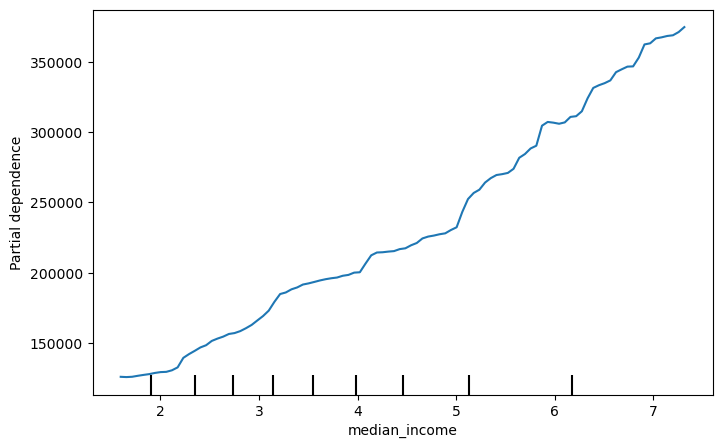

In [80]:
fig, ax = plt.subplots(figsize=(8, 5))

PartialDependenceDisplay.from_estimator(best_model, X_train, [7], ax=ax, feature_names=X_train.keys())

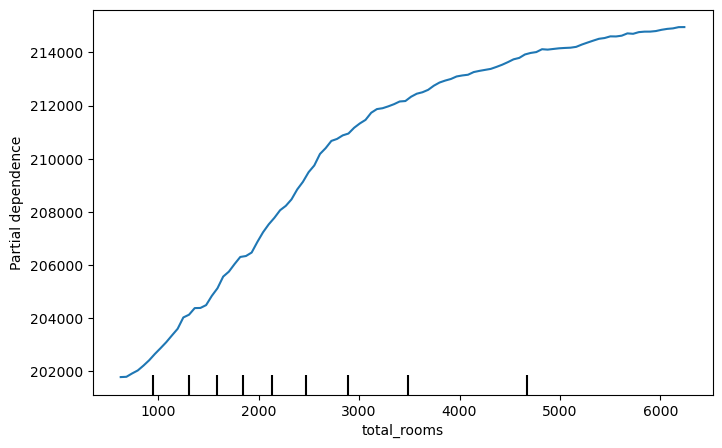

In [81]:
fig, ax = plt.subplots(figsize=(8, 5))

PartialDependenceDisplay.from_estimator(best_model, X_train, [3], ax=ax, feature_names=X_train.keys())

### Partial dependence 3D
PartialDependenceDisplay.from_estimator(best_forest, X_train, [(0, 1)], ax=ax, feature_names=X_train.keys())

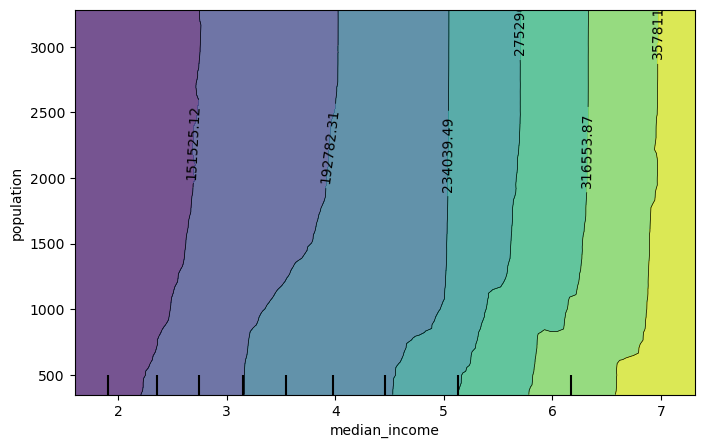

In [82]:
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(best_model, X_train, [(7, 5)], ax=ax, feature_names=X_train.keys())